# 🔍 Data Insight Project: Exploring Anxiety, Lifestyle, and Treatment

## 🎯 Project Objective
This project explores how psychological, behavioral, and demographic factors relate to anxiety levels. The main focus is on treatment types (medical vs. natural), lifestyle choices, and external factors — particularly for people aged 25–44.

---

## 🧠 Central Research Question
What behavioral and contextual patterns are associated with high anxiety levels, especially among individuals with unhealthy lifestyles?

---


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety_dataset.csv")

In [3]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [4]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

## 🔍 Part 1: What causes higher anxiety levels?

In [6]:
# Creating Healthiness Column

from sklearn.preprocessing import MinMaxScaler

# Copy relevant features
health_df = df[['Alcohol Consumption (drinks/week)', 'Smoking', 'Caffeine Intake (mg/day)',
                'Diet Quality (1-10)']].copy()

# Convert binary Yes/No to 1/0
health_df['Smoking'] = health_df['Smoking'].map({'Yes': 1, 'No': 0})

# Invert diet quality so that higher values = less healthy (for consistency)
health_df['Diet Quality (1-10)'] = 10 - health_df['Diet Quality (1-10)']

# Min-Max scale all features to [0, 1]
scaler = MinMaxScaler()
health_scaled = scaler.fit_transform(health_df)

# Create final healthiness score: lower = worse
df['Healthiness'] = 1 - health_scaled.mean(axis=1)

# Divide into 3 quantile-based health groups with custom labels
df['Healthiness Group'] = pd.qcut(
    df['Healthiness'],
    q=3,
    labels=['Unhealthy', 'Balanced', 'Healthy']
)

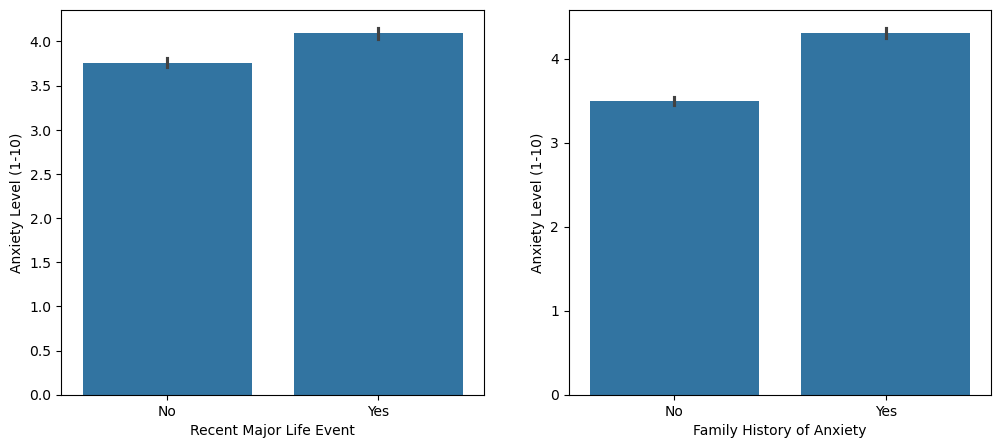

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
my_order1 = df["Recent Major Life Event"].sort_values(ascending = True)
sns.barplot(df, x = "Recent Major Life Event", y = 'Anxiety Level (1-10)', order = my_order1, ax=axes[0])
sns.barplot(df, x = "Family History of Anxiety", y = 'Anxiety Level (1-10)', ax=axes[1])
plt.show()

ניתן לראות שאנשים אשר מנהלים אורח חיים לא בריא מגלים רמות גבוהות יותר של חרדה

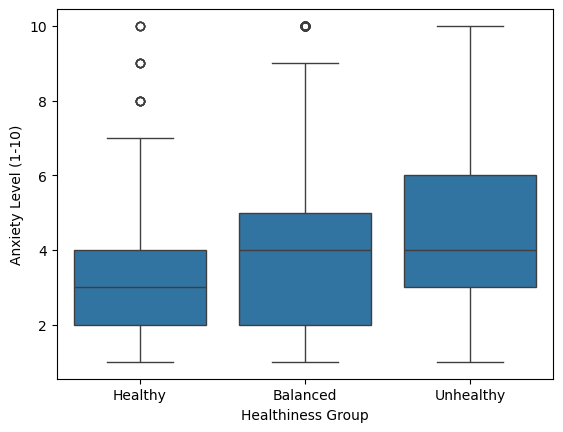

In [10]:
my_order = df['Healthiness Group'].sort_values(ascending = False)
sns.boxplot(df, x='Healthiness Group', y='Anxiety Level (1-10)', order = my_order)
plt.show()

## 💊 Part 2: How do unhealthy individuals receive treatment?

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\3312418233.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=care_counts, x='Care Type', y='Count', palette='Set2')


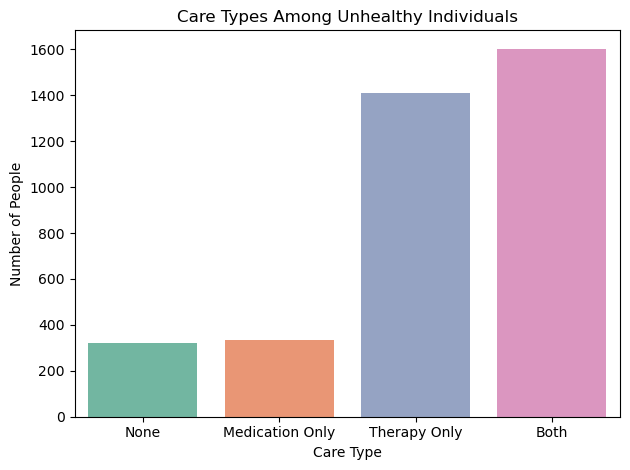

In [12]:
# Step 1: Filter only unhealthy people
unhealthy_df = df[df['Healthiness Group'] == 'Unhealthy'].copy()

# Step 2: Create a new column for care type
def care_type(row):
    therapy = row['Therapy Sessions (per month)'] > 0
    medication = row['Medication'] == 'Yes'
    
    if therapy and medication:
        return 'Both'
    elif therapy:
        return 'Therapy Only'
    elif medication:
        return 'Medication Only'
    else:
        return 'None'

unhealthy_df['Care Type'] = unhealthy_df.apply(care_type, axis=1)

# Step 3: Count care types
care_counts = unhealthy_df['Care Type'].value_counts().reset_index()
care_counts.columns = ['Care Type', 'Count']

# Step 4: Plot sorted barplot
care_counts = care_counts.sort_values(by='Count', ascending=True)
sns.barplot(data=care_counts, x='Care Type', y='Count', palette='Set2')
plt.title("Care Types Among Unhealthy Individuals")
plt.ylabel("Number of People")
plt.xlabel("Care Type")
plt.tight_layout()
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2452020133.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


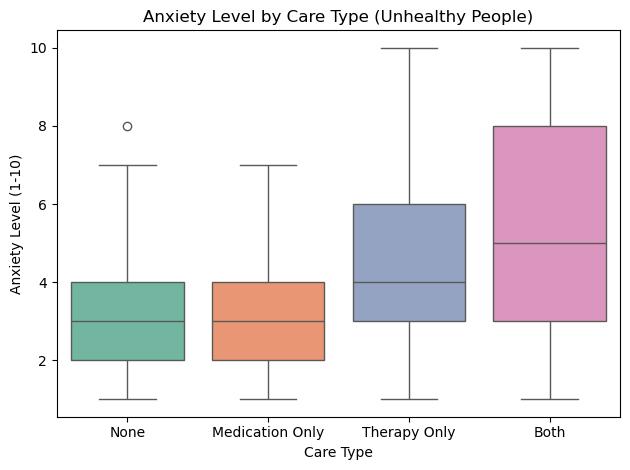

In [13]:
# Step 1: Filter unhealthy group (if not already done)
unhealthy_df = df[df['Healthiness Group'] == 'Unhealthy'].copy()

# Step 2: Define care type per row
def care_type(row):
    therapy = row['Therapy Sessions (per month)'] > 0
    medication = row['Medication'] == 'Yes'
    if therapy and medication:
        return 'Both'
    elif therapy:
        return 'Therapy Only'
    elif medication:
        return 'Medication Only'
    else:
        return 'None'

unhealthy_df['Care Type'] = unhealthy_df.apply(care_type, axis=1)

# Step 3: Plot boxplot of anxiety level per care type
care_order = (
    unhealthy_df.groupby('Care Type')['Anxiety Level (1-10)']
    .mean()
    .sort_values()
    .index
)
sns.boxplot(
    data=unhealthy_df,
    x='Care Type',
    y='Anxiety Level (1-10)',
    order=care_order,
    palette='Set2'
)
plt.title("Anxiety Level by Care Type (Unhealthy People)")
plt.xlabel("Care Type")
plt.ylabel("Anxiety Level (1-10)")
plt.tight_layout()
plt.show()


## 🌍 Part 3: External events and their effect on anxiety

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\637321050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\637321050.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


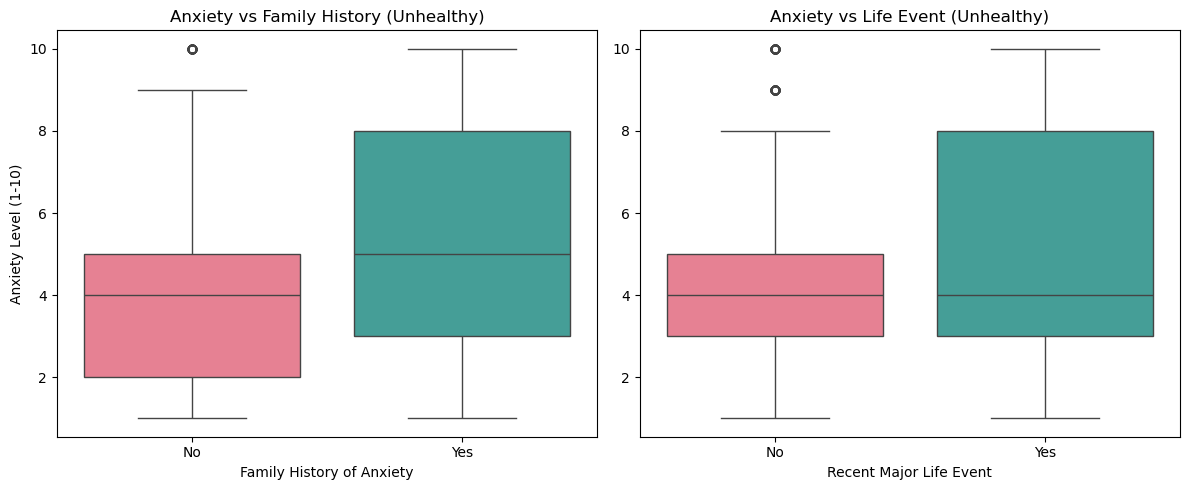

In [15]:
# Filter unhealthy individuals
unhealthy_df = df[df['Healthiness Group'] == 'Unhealthy'].copy()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Family History vs Anxiety
sns.boxplot(
    data=unhealthy_df,
    x='Family History of Anxiety',
    y='Anxiety Level (1-10)',
    ax=axes[0],
    palette='husl'
)
axes[0].set_title("Anxiety vs Family History (Unhealthy)")
axes[0].set_xlabel("Family History of Anxiety")
axes[0].set_ylabel("Anxiety Level (1-10)")

# Recent Life Event vs Anxiety
sns.boxplot(
    data=unhealthy_df,
    x='Recent Major Life Event',
    y='Anxiety Level (1-10)',
    ax=axes[1],
    palette='husl'
)
axes[1].set_title("Anxiety vs Life Event (Unhealthy)")
axes[1].set_xlabel("Recent Major Life Event")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## 😴 Part 4: Sleep and physical activity habits among the unhealthy

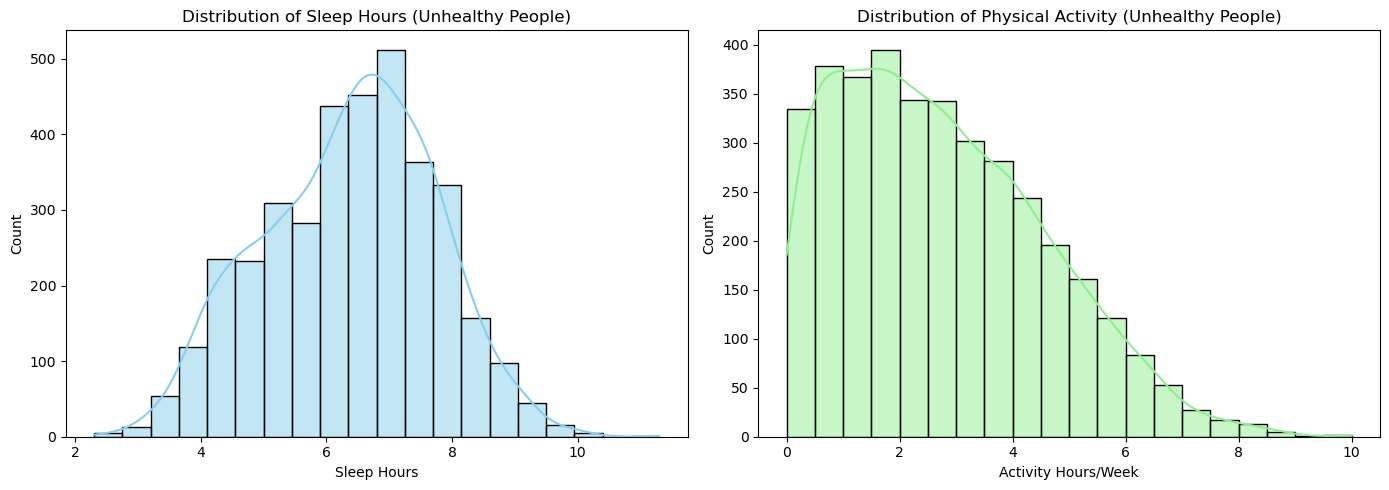

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sleep Hours
sns.histplot(unhealthy_df['Sleep Hours'], kde=True, ax=axes[0], color='skyblue', bins=20)
axes[0].set_title("Distribution of Sleep Hours (Unhealthy People)")
axes[0].set_xlabel("Sleep Hours")
axes[0].set_ylabel("Count")

# Physical Activity
sns.histplot(unhealthy_df['Physical Activity (hrs/week)'], kde=True, ax=axes[1], color='lightgreen', bins=20)
axes[1].set_title("Distribution of Physical Activity (Unhealthy People)")
axes[1].set_xlabel("Activity Hours/Week")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2569663076.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unhealthy_df.groupby('Sleep Quality')['Anxiety Level (1-10)']
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2569663076.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unhealthy_df.groupby('Activity Level')['Anxiety Level (1-10)']
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2569663076.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplo

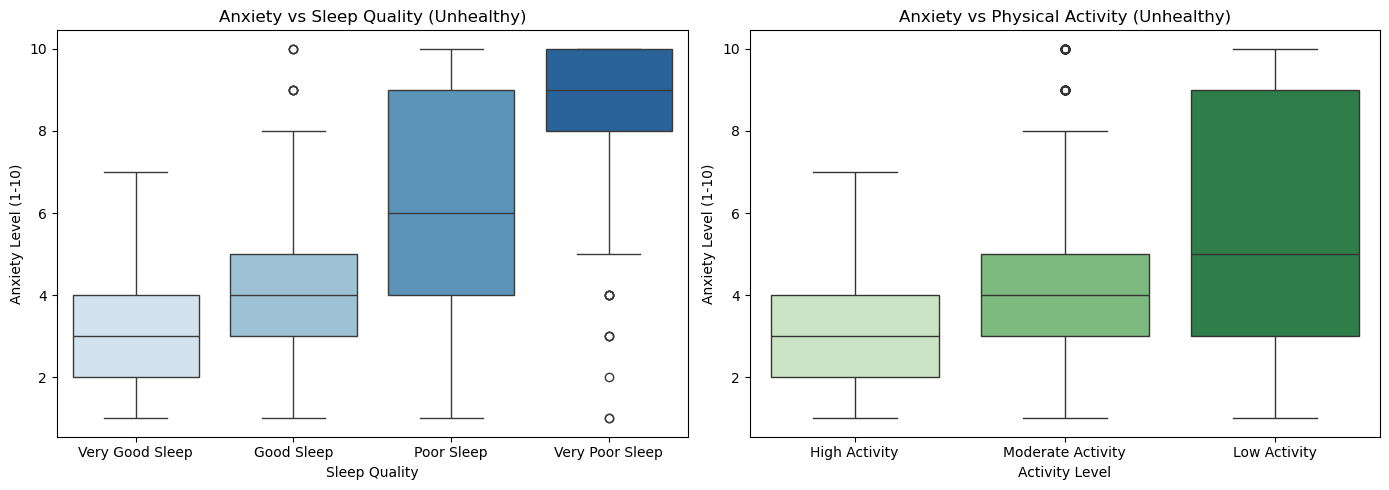

In [18]:
# Step 1: Filter unhealthy group
unhealthy_df = df[df['Healthiness Group'] == 'Unhealthy'].copy()

# Step 2: Define sleep bins and labels
sleep_bins = [0, 4, 6, 7.5, unhealthy_df['Sleep Hours'].max()]
sleep_labels = ['Very Poor Sleep', 'Poor Sleep', 'Good Sleep', 'Very Good Sleep']

unhealthy_df['Sleep Quality'] = pd.cut(
    unhealthy_df['Sleep Hours'],
    bins=sleep_bins,
    labels=sleep_labels,
    include_lowest=True
)

# Step 3: Define physical activity bins and labels
activity_bins = [0, 2, 5, unhealthy_df['Physical Activity (hrs/week)'].max()]
activity_labels = ['Low Activity', 'Moderate Activity', 'High Activity']

unhealthy_df['Activity Level'] = pd.cut(
    unhealthy_df['Physical Activity (hrs/week)'],
    bins=activity_bins,
    labels=activity_labels,
    include_lowest=True
)

# Step 4: Sort categories by average anxiety
sleep_order = (
    unhealthy_df.groupby('Sleep Quality')['Anxiety Level (1-10)']
    .mean()
    .sort_values()
    .index
)

activity_order = (
    unhealthy_df.groupby('Activity Level')['Anxiety Level (1-10)']
    .mean()
    .sort_values()
    .index
)

# Step 5: Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sleep Plot
sns.boxplot(
    data=unhealthy_df,
    x='Sleep Quality',
    y='Anxiety Level (1-10)',
    order=sleep_order,
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title("Anxiety vs Sleep Quality (Unhealthy)")
# axes[0].tick_params(axis='x', rotation=15)

# Activity Plot
sns.boxplot(
    data=unhealthy_df,
    x='Activity Level',
    y='Anxiety Level (1-10)',
    order=activity_order,
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title("Anxiety vs Physical Activity (Unhealthy)")
# axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_21968\3511269773.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target_df, x='Anxiety Level (1-10)', palette='Reds')


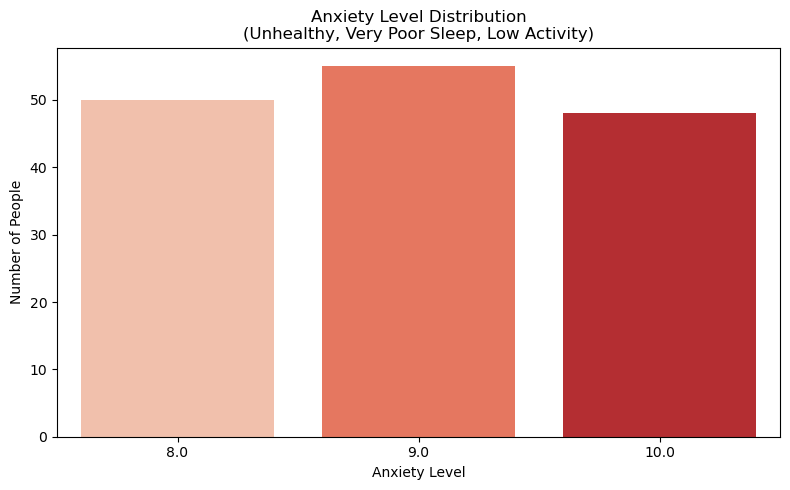

In [19]:
# Create 'Activity Level' column based on physical activity hours
activity_bins = [0, 2, 5, df['Physical Activity (hrs/week)'].max()]
activity_labels = ['Low Activity', 'Moderate Activity', 'High Activity']

df['Activity Level'] = pd.cut(
    df['Physical Activity (hrs/week)'],
    bins=activity_bins,
    labels=activity_labels,
    include_lowest=True
)

sleep_bins = [0, 4, 6, 7.5, df['Sleep Hours'].max()]
sleep_labels = ['Very Poor Sleep', 'Poor Sleep', 'Good Sleep', 'Very Good Sleep']

df['Sleep Quality'] = pd.cut(
    df['Sleep Hours'],
    bins=sleep_bins,
    labels=sleep_labels,
    include_lowest=True
)

target_df = df[
    (df['Healthiness Group'] == 'Unhealthy') &
    (df['Activity Level'] == 'Low Activity') &
    (df['Sleep Quality'].isin(['Very Poor Sleep']) &
    (df['Anxiety Level (1-10)'] > 5))
].copy()
plt.figure(figsize=(8, 5))
sns.countplot(data=target_df, x='Anxiety Level (1-10)', palette='Reds')

plt.title("Anxiety Level Distribution\n(Unhealthy, Very Poor Sleep, Low Activity)")
plt.xlabel("Anxiety Level")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()

## 💼 Part 5: Occupation types of unhealthy individuals

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\975110115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(occupation_anxiety, x = 'Occupation', y = 'Anxiety Level (1-10)', palette='viridis')


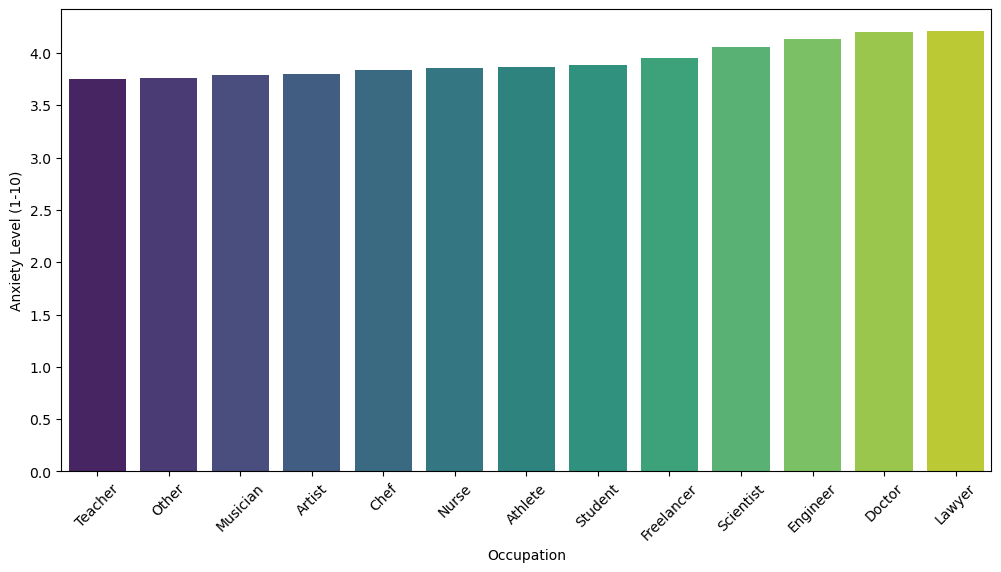

In [8]:
occupation_anxiety = df.groupby('Occupation')['Anxiety Level (1-10)'].mean().reset_index()
occupation_anxiety = occupation_anxiety.sort_values(by='Anxiety Level (1-10)', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(occupation_anxiety, x = 'Occupation', y = 'Anxiety Level (1-10)', palette='viridis')
plt.xticks(rotation=45)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\705714825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_counts, y='Occupation', x='Count', palette='coolwarm')


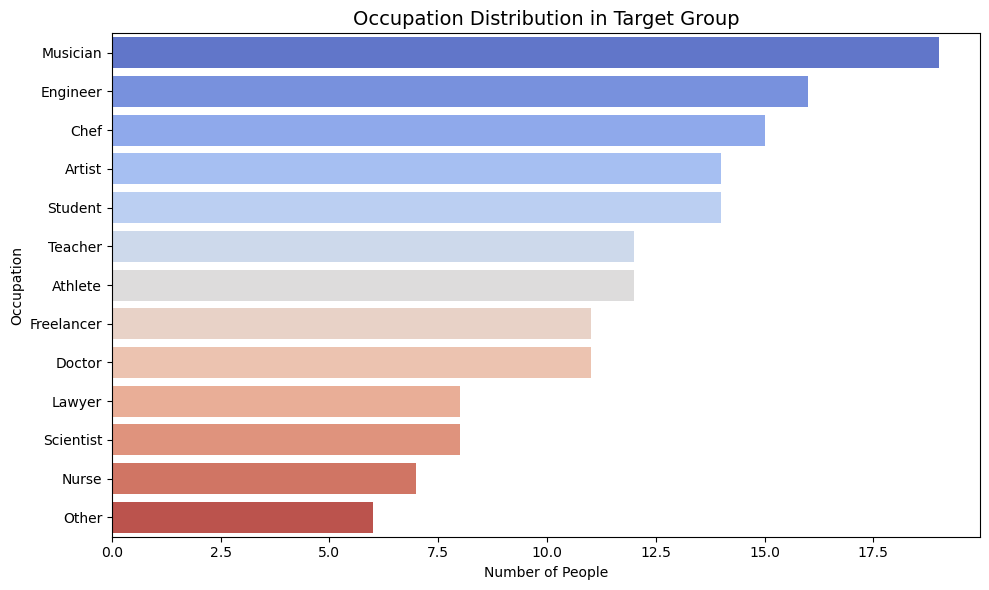

In [21]:
occupation_counts = target_df["Occupation"].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=occupation_counts, y='Occupation', x='Count', palette='coolwarm')

plt.title("Occupation Distribution in Target Group", fontsize=14)
plt.xlabel("Number of People")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

In [22]:
musicians = df[df['Occupation'] == 'Musician']
musicians['Anxiety Level (1-10)'].describe()

count    892.000000
mean       3.789238
std        2.123139
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Anxiety Level (1-10), dtype: float64

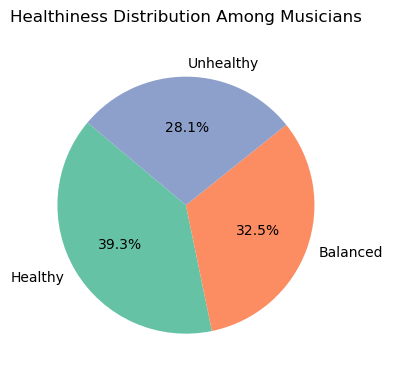

In [23]:
# Filter only musicians
musicians = df[df['Occupation'] == 'Musician']

# Count healthiness categories
health_pie = musicians['Healthiness Group'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    health_pie,
    labels=health_pie.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)
plt.title("Healthiness Distribution Among Musicians")
plt.axis('equal')  # Makes the pie a circle
plt.tight_layout()
plt.show()

## 💊 Comparing Treatment Types


In this section, we compare anxiety levels across treatment types:
- **Medical Treatment**: Those who take medication
- **Natural Treatment**: Those who maintain strong healthy habits and attend therapy
- **Both Treatments**
- **No Treatment**


In [26]:
# Creating Healthy Habits Column
# Start with a copy
df['Healthy Habit Score'] = 0

# 1. Physical activity (e.g., more than 2 hrs/week is decent)
df['Healthy Habit Score'] += df['Physical Activity (hrs/week)'] >= 2

# 2. Good sleep (e.g., 6.5 hours or more per night)
df['Healthy Habit Score'] += df['Sleep Hours'] >= 6.5

# 3. General lifestyle
df['Healthy Habit Score'] += df['Healthiness Group'] == 'Healthy'

# Final classification
def classify_habits(score):
    if score == 0:
        return 'None'
    elif score == 1:
        return 'Some'
    else:
        return 'Strong'

df['Healthy Habits'] = df['Healthy Habit Score'].apply(classify_habits)

In [27]:
# Creating Natural Treatment Column
df['Natural Treatment'] = (
    (df['Healthy Habits'].isin(['Strong'])) &
    (df['Therapy Sessions (per month)'] > 0)
)
if df['Natural Treatment'].dtype == 'bool':
    df['Natural Treatment'] = df['Natural Treatment'].map({True: 'Yes', False: 'No'})

In [28]:
# Creating Treatment Type

df['Treatment Type'] = df.apply(
    lambda row: (
        'Both' if row['Medication'] == 'Yes' and row['Natural Treatment'] == 'Yes' else
        'Medical Only' if row['Medication'] == 'Yes' else
        'Natural Only' if row['Natural Treatment'] == 'Yes' else
        'None'
    ), axis=1
)

In [29]:
# Step 1: Filter only people with a family history
family_history_df = df[df['Family History of Anxiety'] == 'Yes'].copy()

# Step 2: Create a new column indicating treatment type
family_history_df['Treatment Type'] = family_history_df.apply(
    lambda row: (
        'Both' if row['Medication'] == 'Yes' and row['Natural Treatment'] == 'Yes' else
        'Medical Only' if row['Medication'] == 'Yes' else
        'Natural Only' if row['Natural Treatment'] == 'Yes' else
        'None'
    ), axis=1
)


כאן מוסתר גרף המתאר את רמת החרדה מול סוגי הטיפול (תרופתי, פסיכולוג וטבעי). אולי נמצא שימוש לגרף זה בהמשך

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\4043803473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Medication', y='Anxiety Level (1-10)', palette='Reds', ax=axes[0])
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\4043803473.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Therapy Level', y='Anxiety Level (1-10)', palette='Purples', ax=axes[1])
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\4043803473.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Healthy Habits', y='Anxiety Le

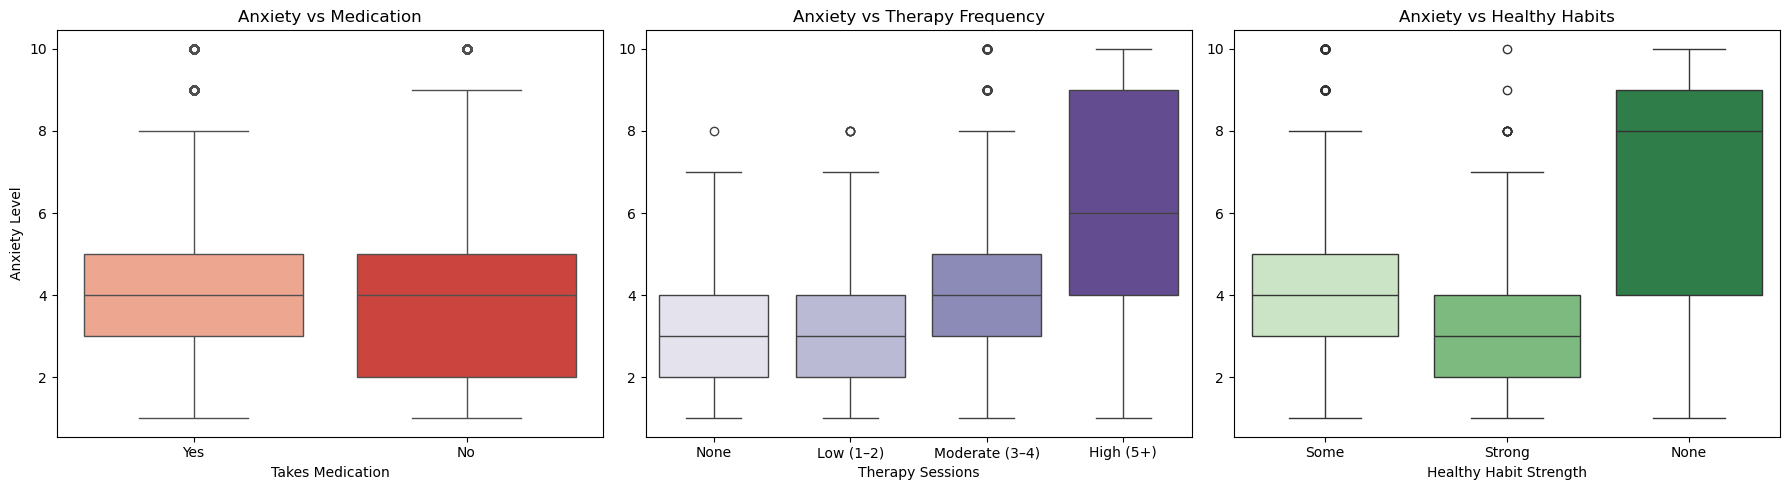

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Anxiety vs Medication
sns.boxplot(data=df, x='Medication', y='Anxiety Level (1-10)', palette='Reds', ax=axes[0])
axes[0].set_title("Anxiety vs Medication")
axes[0].set_xlabel("Takes Medication")
axes[0].set_ylabel("Anxiety Level")

# 2. Anxiety vs Therapy Sessions (binned for readability)
df['Therapy Level'] = pd.cut(
    df['Therapy Sessions (per month)'],
    bins=[-1, 0, 2, 4, df['Therapy Sessions (per month)'].max()],
    labels=['None', 'Low (1–2)', 'Moderate (3–4)', 'High (5+)']
)

sns.boxplot(data=df, x='Therapy Level', y='Anxiety Level (1-10)', palette='Purples', ax=axes[1])
axes[1].set_title("Anxiety vs Therapy Frequency")
axes[1].set_xlabel("Therapy Sessions")
axes[1].set_ylabel("")

# 3. Anxiety vs Healthy Habits
sns.boxplot(data=df, x='Healthy Habits', y='Anxiety Level (1-10)', palette='Greens', ax=axes[2])
axes[2].set_title("Anxiety vs Healthy Habits")
axes[2].set_xlabel("Healthy Habit Strength")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

גרף המתאר את החלוקה בין אנשים הבוחרים בטיפול תרופתי או טבעי

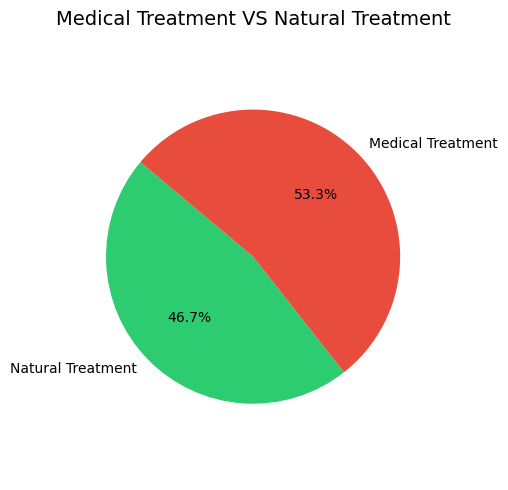

In [33]:
# Count 'Yes' values
natural_yes = df['Natural Treatment'].value_counts().get('Yes', 0)
medical_yes = df['Medication'].value_counts().get('Yes', 0)

# Data for pie chart
labels = ['Natural Treatment', 'Medical Treatment']
sizes = [natural_yes, medical_yes]

# Stronger, vibrant color palette
colors = ['#2ecc71', '#e74c3c']  # Green and Red

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Medical Treatment VS Natural Treatment', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


גרף המתאר את החלוקה בין אנשים הבוחרים בטיפול תרופתי, טבעי, גם וגם וכלל לא

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2595939831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=treatment_counts, x='Treatment Type', y='Count', palette='Set2')


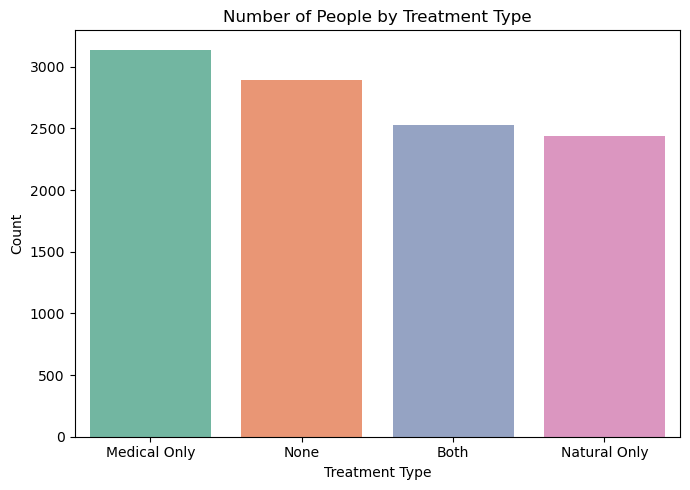

In [35]:
treatment_counts = df['Treatment Type'].value_counts().reset_index()
treatment_counts.columns = ['Treatment Type', 'Count']
plt.figure(figsize=(7, 5))
sns.barplot(data=treatment_counts, x='Treatment Type', y='Count', palette='Set2')
plt.title("Number of People by Treatment Type")
plt.xlabel("Treatment Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 📊 Anxiety Distribution by Treatment Type

Boxplots below illustrate the spread and median anxiety levels for each treatment category. We observe that natural treatment tends to be associated with lower anxiety levels on average, particularly in younger adults.


C:\Users\danie\AppData\Local\Temp\ipykernel_21968\2721357771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Treatment Type', y='Anxiety Level (1-10)', palette='Set1')


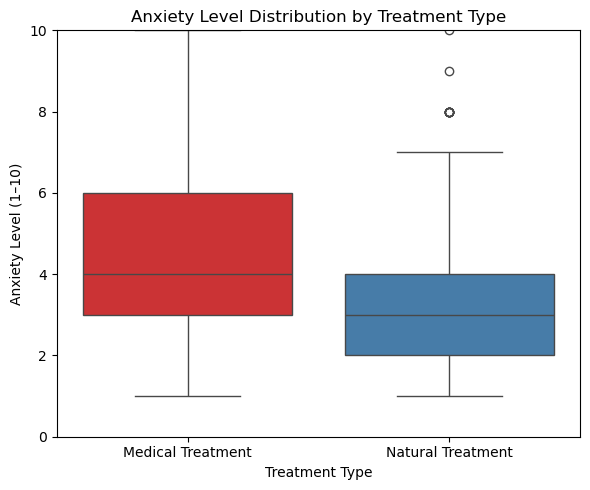

In [37]:
# Create a new column indicating treatment type for individuals with each treatment
df_box = df.copy()
df_box['Treatment Type'] = None

# Assign labels only for those with treatment = Yes
df_box.loc[df_box['Medication'] == 'Yes', 'Treatment Type'] = 'Medical Treatment'
df_box.loc[df_box['Natural Treatment'] == 'Yes', 'Treatment Type'] = 'Natural Treatment'

# Filter to keep only rows where treatment type was set
df_box = df_box[df_box['Treatment Type'].notna()]

# Plot the boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_box, x='Treatment Type', y='Anxiety Level (1-10)', palette='Set1')

plt.title("Anxiety Level Distribution by Treatment Type")
plt.ylabel("Anxiety Level (1–10)")
plt.xlabel("Treatment Type")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


## ועכשיו להשוואה על פי הגילאים

In [39]:
# Create Age Group
bins = [17, 24, 34, 44, 54, 64]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


התפלגות סוג הטיפול (תרופתי או טבעי) על פי חלוקה לגילאים

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\3909664556.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['Age Group', 'Treatment Type'])


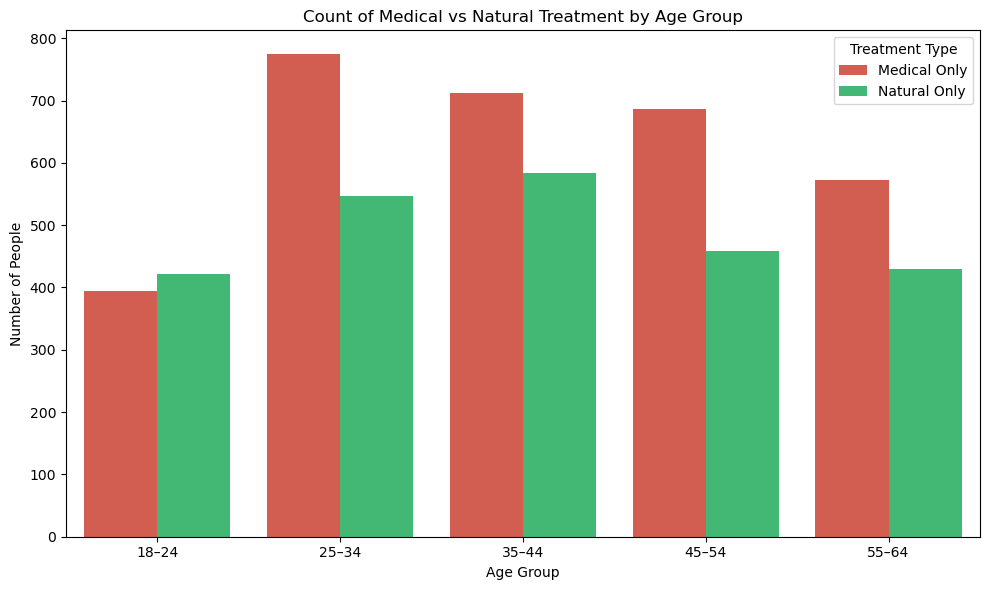

In [41]:
# Filter only rows with either Medical Only or Natural Only treatment
filtered_df = df[df['Treatment Type'].isin(['Medical Only', 'Natural Only'])]

# Count number of people in each treatment type per age group
treatment_counts = (
    filtered_df.groupby(['Age Group', 'Treatment Type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Melt for seaborn barplot
melted = treatment_counts.melt(id_vars='Age Group', var_name='Treatment Type', value_name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Age Group', y='Count', hue='Treatment Type', palette=['#e74c3c', '#2ecc71'])

plt.title("Count of Medical vs Natural Treatment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(title="Treatment Type")
plt.tight_layout()
plt.show()


ניתן לראות שאנשים בגילאי ה - 25-44 נוטים לקחת יותר תרופות עבור טיפול נפשי, ובנוסף גם בוחרים באורח חיים בריא יותר

נבצע השוואה אל מול רמת החרדה

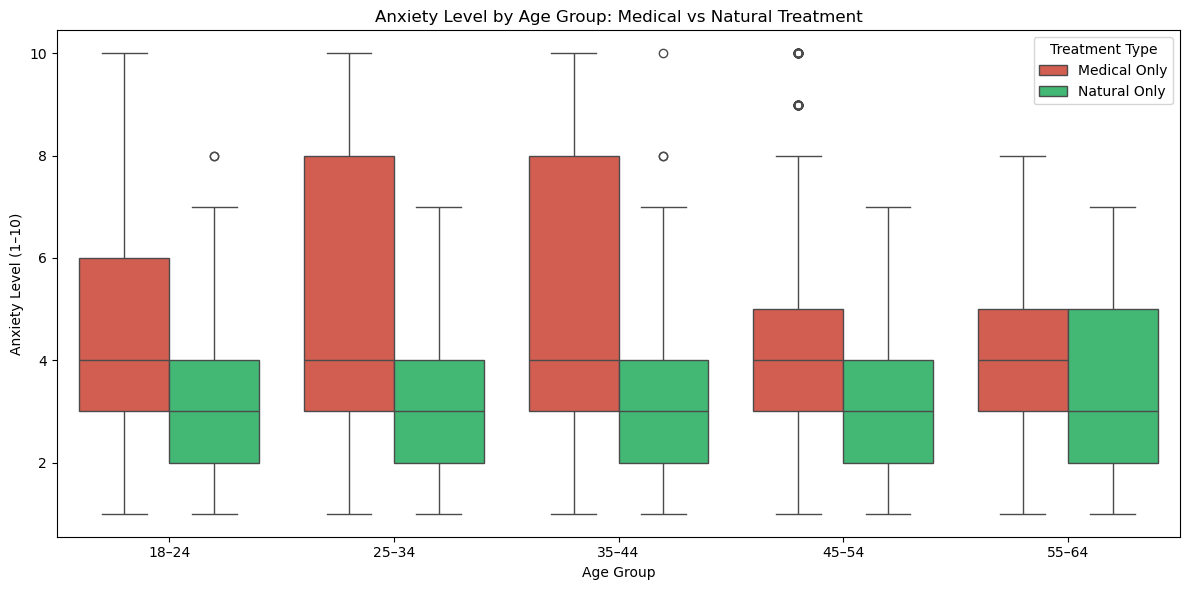

In [43]:
# Filter only Medical Only or Natural Only treatments
filtered_df = df[df['Treatment Type'].isin(['Natural Only', 'Medical Only'])]

# Plot boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=filtered_df,
    x='Age Group',
    y='Anxiety Level (1-10)',
    hue='Treatment Type',
    hue_order=['Medical Only', 'Natural Only'],  # This sets the left-right order
    palette={'Medical Only': '#e74c3c', 'Natural Only': '#2ecc71'}  # Red left, green right
)

# Set legend in correct order (Medical first)
handles, labels = ax.get_legend_handles_labels()
new_order = [labels.index('Medical Only'), labels.index('Natural Only')]
ax.legend(
    [handles[i] for i in new_order],
    [labels[i] for i in new_order],
    title="Treatment Type"
)

plt.title("Anxiety Level by Age Group: Medical vs Natural Treatment")
plt.xlabel("Age Group")
plt.ylabel("Anxiety Level (1–10)")
plt.tight_layout()
plt.show()


## 👥 Age-Specific Treatment Response (25–44)


We further analyze anxiety levels in age groups 25–34 and 35–44, where we observe higher average anxiety. This allows us to examine the effectiveness of different treatment strategies within high-risk age bands.


ניתן לראות שאוכלוסיית הגילאים 25-44 (גם 18-24) אשר משתמשת בטיפול תרופתי נוטה לרמת חרדה גבוהה יותר.

ניקח קבוצה זו ונבדוק מה משפיע לה, נבדוק האם:
- קרה להם אירוע גדול בחיים לאחרונה או יש להם היסטוריה חרדתית משפחתית
- הם חיים אורח חיים לא בריא, לא ישנים מספיק, לא מתאמנים
- נבצע חיתוך לרמות חרדה אשר גבוהות מ5

לרוב המוחלט, 77%, יש איזשהו גורם פסיכולוגי אשר השפיע על רמת החרדה שלהם 

(היסטוריית חרדה משפחתית או אירוע משמעותי שקרה לאחרונה בחיים)

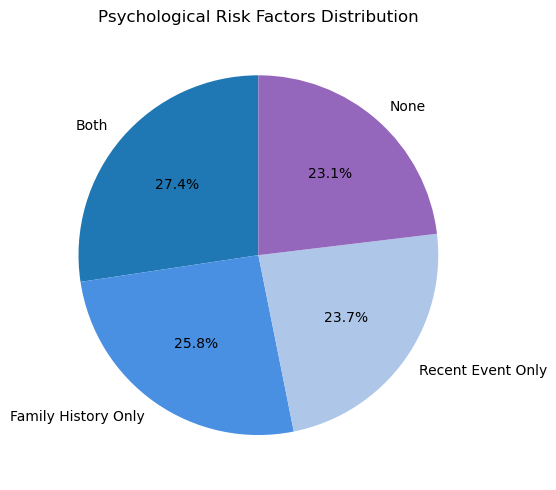

In [48]:
def categorize_combined(row):
    if row['Family History of Anxiety'] == 'Yes' and row['Recent Major Life Event'] == 'Yes':
        return 'Both'
    elif row['Family History of Anxiety'] == 'Yes':
        return 'Family History Only'
    elif row['Recent Major Life Event'] == 'Yes':
        return 'Recent Event Only'
    else:
        return 'None'

df['Psychological Factors'] = df.apply(categorize_combined, axis=1)
# Define custom colors: shades of blue for risk, purple for no risk
color_map_final = {
    'Both': '#1f77b4',                  # dark blue
    'Family History Only': '#4a90e2',   # medium blue
    'Recent Event Only': '#aec7e8',     # light blue
    'None': '#9467bd'                   # purple
}

# Reorder categories for consistent plotting
ordered_counts = df['Psychological Factors'].value_counts().reindex(['Both', 'Family History Only', 'Recent Event Only', 'None'])

# Plot pie chart
plt.figure(figsize=(8, 5))
plt.pie(
    ordered_counts,
    labels=ordered_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[color_map_final[label] for label in ordered_counts.index]
)
plt.title("Psychological Risk Factors Distribution")
plt.tight_layout()
plt.show()


ניתן לראות שהיסטוריית חרדה משפחתית משפיעה יותר מאירועים מרכזיים שקרו לאחרונה

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\1387408909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\1387408909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


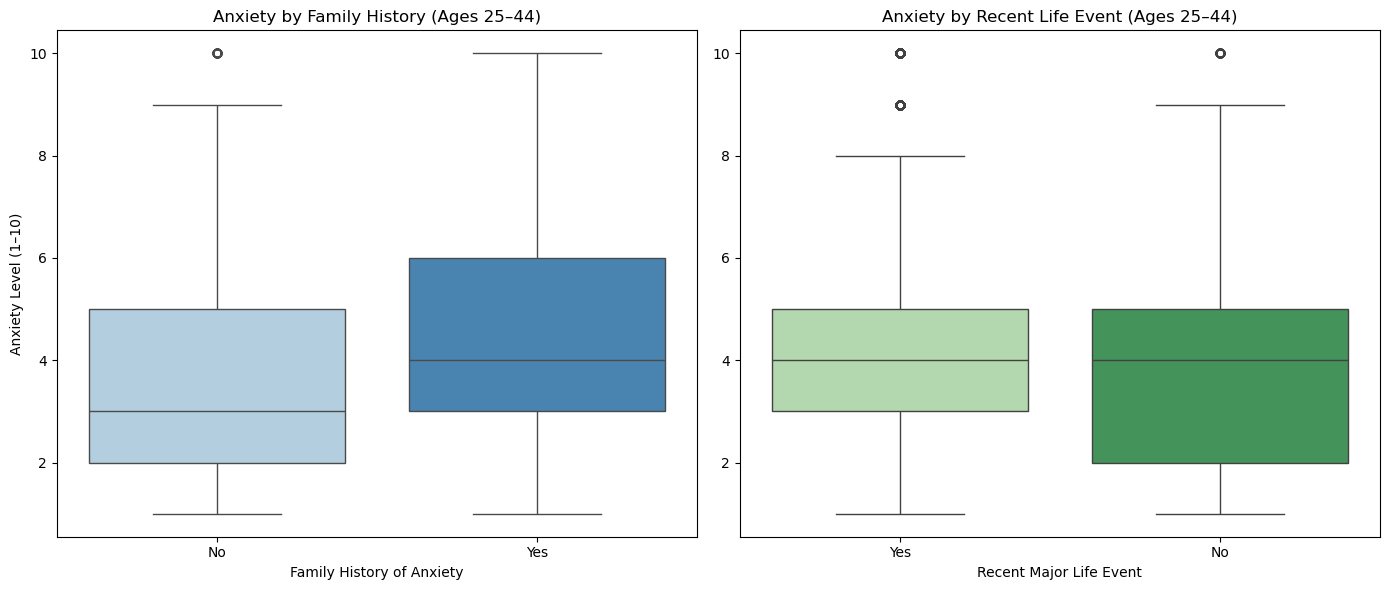

In [50]:
# Filter ages between 25 and 44
age_filtered_df = df[(df['Age'] >= 25) & (df['Age'] <= 44)]

# Create a side-by-side boxplot comparison: Family History vs Recent Life Event
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Family History of Anxiety
sns.boxplot(
    data=age_filtered_df,
    x='Family History of Anxiety',
    y='Anxiety Level (1-10)',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title("Anxiety by Family History (Ages 25–44)")
axes[0].set_xlabel("Family History of Anxiety")
axes[0].set_ylabel("Anxiety Level (1–10)")

# Plot 2: Recent Major Life Event
sns.boxplot(
    data=age_filtered_df,
    x='Recent Major Life Event',
    y='Anxiety Level (1-10)',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title("Anxiety by Recent Life Event (Ages 25–44)")
axes[1].set_xlabel("Recent Major Life Event")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


נבדוק את התפלגות אורח החיים של הנבדקים שלנו

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\361894333.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


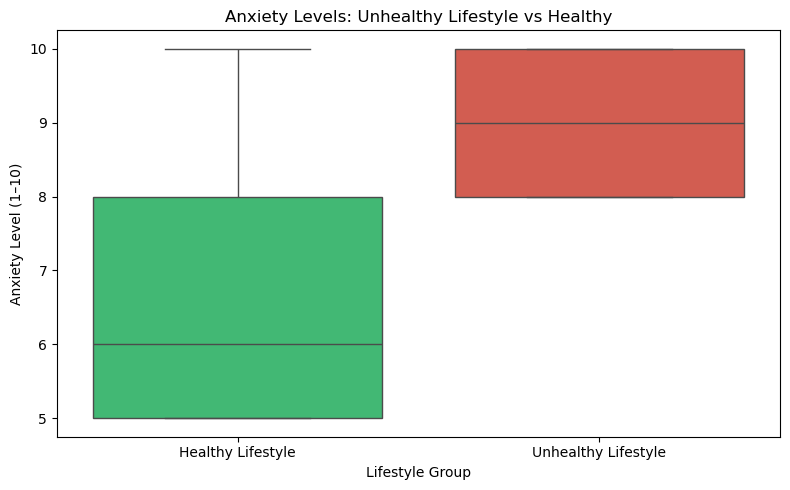

In [52]:
target_df = df[
    (df['Age Group'].isin(['25–34', '35–44'])) &
    (df['Anxiety Level (1-10)'] >= 5)
].copy()

# Create group label: 'Unhealthy Lifestyle' or 'Healthy'
target_df['Lifestyle Group'] = target_df.apply(
    lambda row: 'Unhealthy Lifestyle' if (
        row['Healthiness Group'] == 'Unhealthy' and
        row['Sleep Hours'] < 5 and
        row['Physical Activity (hrs/week)'] == 0
    ) else 'Healthy Lifestyle',
    axis=1
)

# Boxplot comparison
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=target_df,
    x='Lifestyle Group',
    y='Anxiety Level (1-10)',
    palette=['#2ecc71', '#e74c3c']
)
plt.title("Anxiety Levels: Unhealthy Lifestyle vs Healthy")
plt.xlabel("Lifestyle Group")
plt.ylabel("Anxiety Level (1–10)")
plt.tight_layout()
plt.show()

ונבדוק איפה מתגלים רמות גבוהות יותר של חרדה:
- אצל אנשים בעלי היסטוריה משפחתית חרדתית
- או אצל אנשים אשר מנהלים אורח חיים לא בריא

החלוקה ביניהם

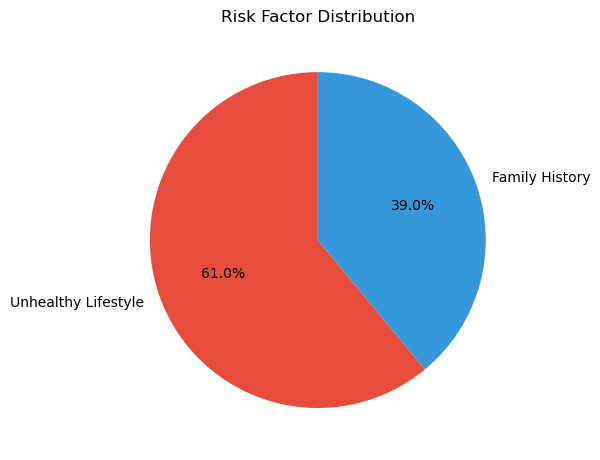

In [55]:
# Filter the relevant subset
subset = df[
    (df['Age'] >= 25) & (df['Age'] <= 44) &
    (df['Anxiety Level (1-10)'] >= 5)
].copy()

# Define risk group assignment function
def risk_group(row):
    if row['Healthiness Group'] == 'Unhealthy':
        return 'Unhealthy Lifestyle'
    elif row['Family History of Anxiety'] == 'Yes':
        return 'Family History'
    else:
        return 'Other'  # Optional

# Apply the function to create the new column
subset['Risk Factor'] = subset.apply(risk_group, axis=1)

# Count only the relevant risk groups
filtered_counts = subset['Risk Factor'].value_counts().loc[['Unhealthy Lifestyle', 'Family History']]

# Pie chart
colors = ['#e74c3c', '#3498db']
plt.figure(figsize=(6, 6))
plt.pie(
    filtered_counts,
    labels=filtered_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Risk Factor Distribution")
plt.tight_layout()
plt.show()


רמת החרדה ביחס לגורמים אלו

C:\Users\danie\AppData\Local\Temp\ipykernel_21968\4094621164.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='Risk Factor', y='Anxiety Level (1-10)', palette='Set2')


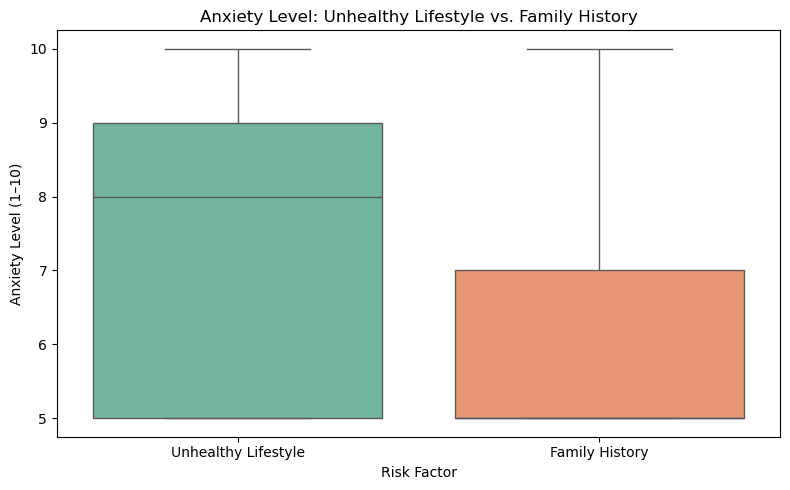

In [57]:
# Filter the relevant subset
subset = df[
    (df['Age'] >= 25) & (df['Age'] <= 44) &
    (df['Anxiety Level (1-10)'] >= 5)
].copy()

# Define the risk group function using existing columns
def risk_group(row):
    if row['Healthiness Group'] == 'Unhealthy':
        return 'Unhealthy Lifestyle'
    elif row['Family History of Anxiety'] == 'Yes':
        return 'Family History'

# Apply the function to assign risk factors
subset['Risk Factor'] = subset.apply(risk_group, axis=1)

# Boxplot: Anxiety Level by Risk Factor
plt.figure(figsize=(8, 5))
sns.boxplot(data=subset, x='Risk Factor', y='Anxiety Level (1-10)', palette='Set2')
plt.title("Anxiety Level: Unhealthy Lifestyle vs. Family History")
plt.xlabel("Risk Factor")
plt.ylabel("Anxiety Level (1–10)")
plt.tight_layout()
plt.show()


ובקבוצה זו, כמה מהם לוקחים תרופות וכמה בוחרים באורח חיים טבעי ואיך החרדה שלהם מתפלגת?

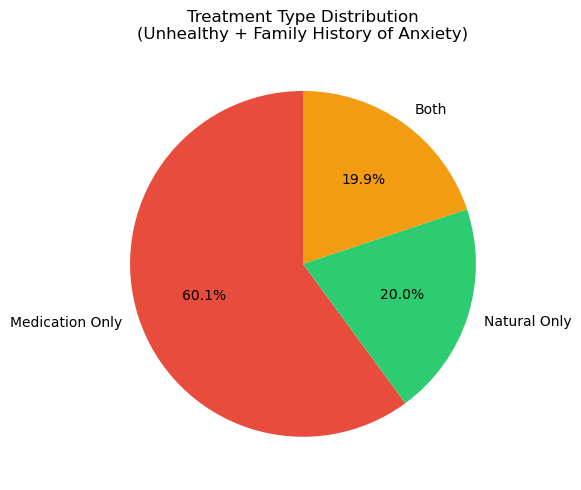

In [59]:
# סינון לפי תנאים: גילאים 25–44, הרגלים לא בריאים, והיסטוריה משפחתית של חרדה
target_df = df[
    (df['Age'] >= 25) & (df['Age'] <= 44) &
    (df['Healthiness Group'] == 'Unhealthy') &
    (df['Family History of Anxiety'] == 'Yes') &
    (
        (df['Medication'] == 'Yes') | (df['Natural Treatment'] == 'Yes')
    )
].copy()

# יצירת עמודת טיפול
def determine_treatment(row):
    if row['Medication'] == 'Yes' and row['Natural Treatment'] == 'Yes':
        return 'Both'
    elif row['Medication'] == 'Yes':
        return 'Medication Only'
    elif row['Natural Treatment'] == 'Yes':
        return 'Natural Only'
    else:
        return 'None'

target_df['Treatment Type'] = target_df.apply(determine_treatment, axis=1)

# סופרים רק את הסוגים הרלוונטיים (כולל Both)
treatment_counts = target_df['Treatment Type'].value_counts().reindex(['Medication Only', 'Natural Only', 'Both'])

# ציור תרשים עוגה
colors = ['#e74c3c', '#2ecc71', '#f39c12']  # אדום, ירוק, כתום

plt.figure(figsize=(8, 5))
plt.pie(
    treatment_counts,
    labels=treatment_counts.index,
    autopct='%1.1f%%',
   startangle=90,
    colors=colors
)
plt.title("Treatment Type Distribution\n(Unhealthy + Family History of Anxiety)")
plt.tight_layout()
plt.show()



C:\Users\danie\AppData\Local\Temp\ipykernel_21968\3930213546.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\danie\AppData\Local\Temp\ipykernel_21968\3930213546.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


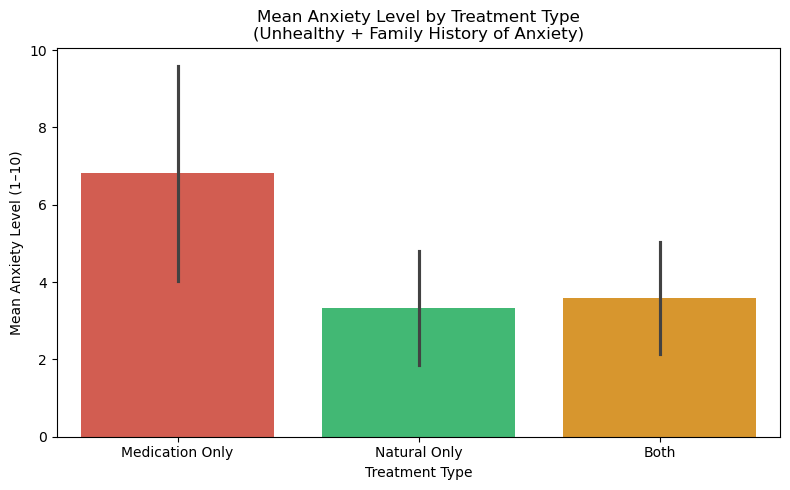

In [60]:
def treatment_label(row):
    if row['Medication'] == 'Yes' and row['Natural Treatment'] == 'Yes':
        return 'Both'
    elif row['Medication'] == 'Yes':
        return 'Medication Only'
    elif row['Natural Treatment'] == 'Yes':
        return 'Natural Only'
    else:
        return 'None'

target_df['Treatment Type'] = target_df.apply(treatment_label, axis=1)

# גרף עמודות להשוואת רמות חרדה
plt.figure(figsize=(8, 5))
sns.barplot(
    data=target_df,
    x='Treatment Type',
    y='Anxiety Level (1-10)',
    palette=['#e74c3c', '#2ecc71', '#f39c12'],
    ci='sd'
)
plt.title("Mean Anxiety Level by Treatment Type\n(Unhealthy + Family History of Anxiety)")
plt.xlabel("Treatment Type")
plt.ylabel("Mean Anxiety Level (1–10)")
plt.tight_layout()
plt.show()

## 🧾 מסקנה סופית

הממצאים שלנו מצביעים על דפוס עקבי: אנשים שמנהלים אורח חיים לא בריא חווים רמות חרדה גבוהות באופן משמעותי. הנקודות המרכזיות הן:

- אנשים אלו נוטים פחות לפנות לטיפול רפואי, ונשענים יותר על טיפול טבעי או היעדר טיפול כלל.  
- אירועים חיצוניים (כמו משברים עולמיים או השפעה תקשורתית) מגבירים אצלם את רמות החרדה יותר מאשר באוכלוסייה הבריאה.  
- שינה לקויה וחוסר בפעילות גופנית קשורים באופן חזק לעלייה ברמות החרדה.  
- חלק ניכר מקבוצה זו עוסק במקצועות המאופיינים ביציבות נמוכה או בלחץ גבוה.  

🧠 **תובנה**: התערבות ממוקדת לשיפור הרגלי חיים ולמתן גישה נוחה יותר לתמיכה רפואית עשויה להפחית בצורה ניכרת את רמות החרדה בקרב אוכלוסייה פגיעה זו.

📌 **השלב הבא**: פיתוח קמפיין או תוכנית תמיכה ייעודית לגילאי 25–44 המראים סימנים לאורח חיים לא בריא.

---

### 🔎 תובנה נוספת מתוך הניתוח:

קבוצות הגילאים **25–44** מגלות שימוש נרחב יותר בתרופות פסיכולוגיות – אך גם חיים אורח חיים בריא יותר ביחס לאחרים.  
מעניין לראות שרמות החרדה אצל אלו הנוטלים תרופות פסיכיאטריות גבוהות **באופן מובהק** לעומת אלה שמובילים אורח חיים טבעי ובריא, ומשלבים טיפול רגשי אצל פסיכולוג.

בחתך הנתונים שבוצע, עולה כי מרבית האנשים המדווחים על רמות חרדה גבוהות:  
- מציינים אורח חיים מאוד לא בריא (עישון, שתייה מרובה, שעות שינה מעטות)  
- מדווחים על **היסטוריה משפחתית של חרדה**  